In [1]:
from EDA.visualization import *

> # 1. Feature Engineering


## 1-1. feature 가공 전 상관관계 확인 

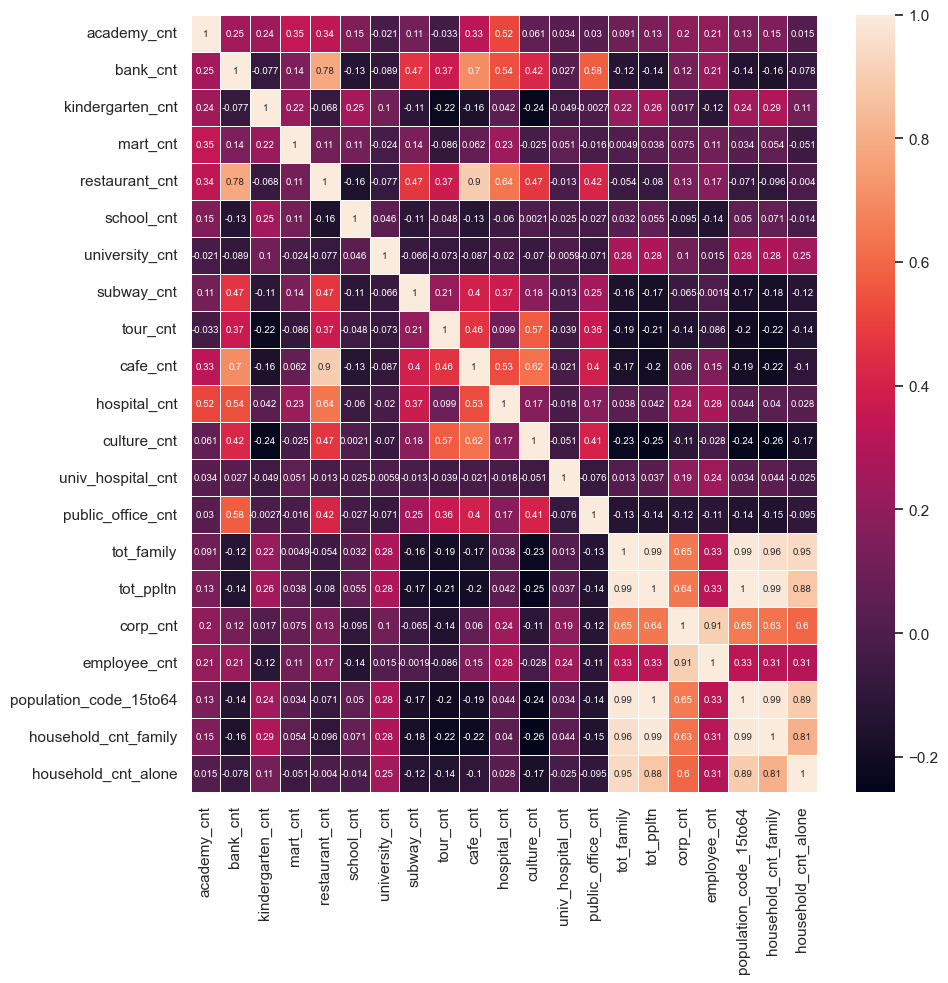

In [2]:
df_check1, df_check2 =get_heatmap_data()
get_heatmap(df_check1)

- 변수 간 상관관계 분석을 위해 heatmap 생성.  
- <u>통계 데이터</u>끼리 높은 상관관계를 보이는 경향 발견.
  - 통계 데이터: tot_family(총 가구수), tot_ppltn(총 인구수), corp_cnt(사업체 수), employee_cnt(종사자 수) 등등
- 통계 데이터는 인구, 사업체 관련 지역별 특징 추출을 위해 반드시 필요하므로 Feature Extraction을 통해 <u>특성을 조합</u>하여 상관관계를 낮춰보고자 함.

 ## 1-2. Feature Extraction 진행
 - `alone_ratio`
   - 식: household_cnt_alone(1인가구 수) / tot_family(총 가구 수)
   - 의미: 총 가구 수 대비 1인 가구 수 비율
 - `corp_emp_ratio`
   - 식: corp_cnt(사업체 수)/employee_cnt(종사자 수)
   - 의미: 한 사업체 당 종사자 수. 사업체 규모
   -  <style type="text/css">
      .tg  {border-collapse:collapse;border-color:#ccc;border-spacing:0;}
      .tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
        font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
      .tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
        font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
      .tg .tg-ma9z{border-color:#000000;font-family:"Lucida Sans Unicode", "Lucida Grande", sans-serif !important;font-size:13px;
        font-weight:bold;text-align:center;vertical-align:top}
      .tg .tg-xflk{border-color:#000000;font-family:"Lucida Sans Unicode", "Lucida Grande", sans-serif !important;font-size:13px;
        text-align:center;vertical-align:top}
      </style>
      <table class="tg">
      <thead>
        <tr>
          <th class="tg-ma9z">Feature</th>
          <th class="tg-ma9z">Extracted Feature</th>
          <th class="tg-ma9z">Extracted Feature <br>공식</th>
          <th class="tg-ma9z">Extracted Feature<br>의미</th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <td class="tg-xflk">household_alone_cnt<br>(1인가구 수)</td>
          <td class="tg-xflk" rowspan="2">alone_ratio</td>
          <td class="tg-xflk" rowspan="2">household_cnt_alone/<br>tot_family</td>
          <td class="tg-xflk" rowspan="2">총 가구 수 대비 <br>1인 가구 수 비율</td>
        </tr>
        <tr>
          <td class="tg-xflk">tot_family<br>(총 가구 수)</td>
        </tr>
        <tr>
          <td class="tg-xflk">corp_cnt<br>(총 사업체 수)</td>
          <td class="tg-xflk" rowspan="2">corp_emp_cnt</td>
          <td class="tg-xflk" rowspan="2">corp_cnt/employee_cnt</td>
          <td class="tg-xflk" rowspan="2">한 사업체 당 종사자 수.<br>사업체 규모.</td>
        </tr>
        <tr>
          <td class="tg-xflk">employee_cnt<br>(총 종사자 수)</td>
        </tr>
      </tbody>
      </table>

- 기존의 feature & Extracted feature와 중복된 의미를 지닌 feature → 제거
  - tot_ppltn (총 인구 수)
  - household_cnt_family (친족가구 수)


## 1-3. Feature Selection 진행
- alone_ratio, corp_emp_ratio 산출에 쓰였던 컬럼 중 타 변수들과 상관관계가 높은 변수들 제거.
    - household_cnt_alone, tot_ppltn, corp_cnt
- 그 후, heatmap 통해 상관관계 재확인.

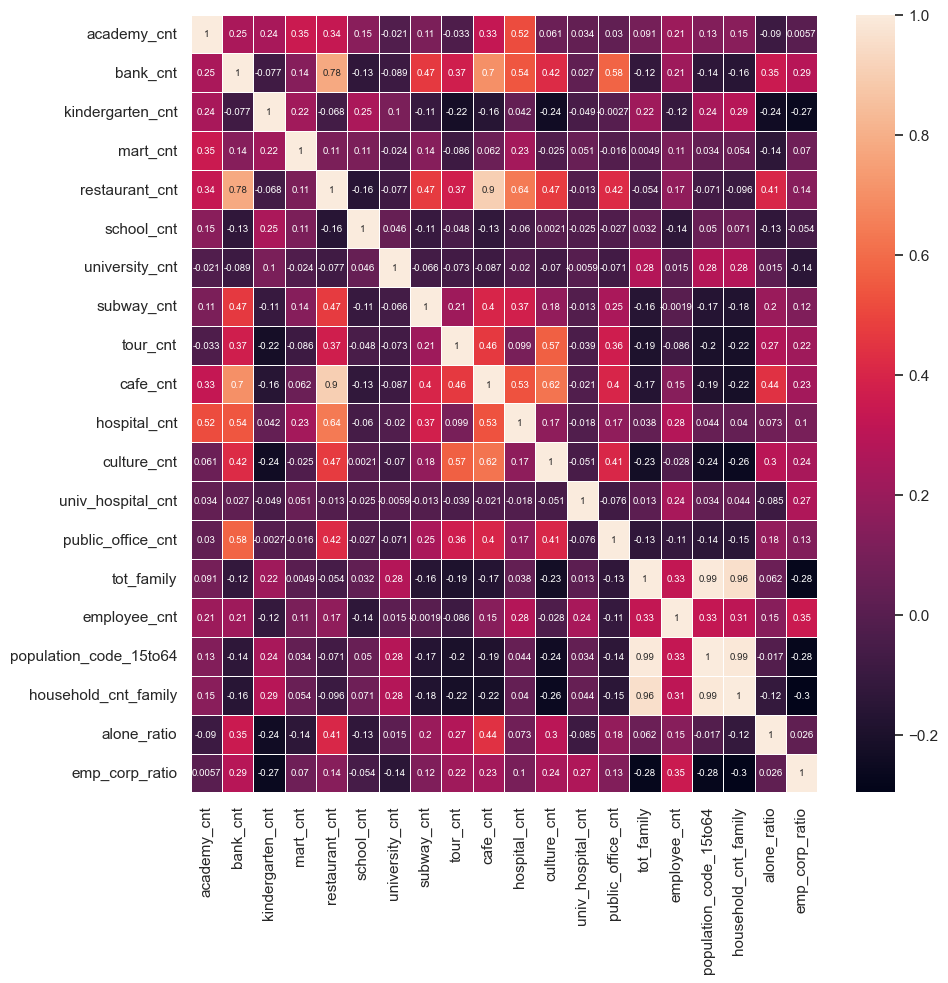

In [3]:
df = tb_infra_population
df['alone_ratio'] = df['household_cnt_alone']/df['tot_ppltn'] 
df['emp_corp_ratio'] = df['employee_cnt']/df['corp_cnt']

drop_col = ['household_cnt_alone','tot_ppltn','corp_cnt']
df = df.drop(drop_col,axis=1)

heatmap_col = ['academy_cnt', 'bank_cnt', 'kindergarten_cnt', 'mart_cnt',
       'restaurant_cnt', 'school_cnt', 'university_cnt', 'subway_cnt',
       'tour_cnt', 'cafe_cnt', 'hospital_cnt', 'culture_cnt',
       'univ_hospital_cnt', 'public_office_cnt', 'tot_family', 'employee_cnt',
       'population_code_15to64', 'household_cnt_family', 'alone_ratio',
       'emp_corp_ratio']
       
get_heatmap(df[heatmap_col])

- 잔존 변수 중, population_code_15to64(경제인구 수)는 지역별 특징 확인에 반드시 필요하다 생각.
- 따라서 <u>population_code_15to64와 상관관계가 높은 변수들</u> 제거.
  - tot_family, household_cnt_family
  - <style type="text/css">
.tg  {border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Feature1</th>
    <th class="tg-7btt">Feature2</th>
    <th class="tg-7btt">상관계수</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow" rowspan="2">population_15to64<br>(경제활동인구)</td>
    <td class="tg-c3ow">tot_family</td>
    <td class="tg-c3ow">0.99</td>
  </tr>
  <tr>
    <td class="tg-c3ow">household_cnt_family</td>
    <td class="tg-c3ow">0.96</td>
  </tr>
</tbody>
</table>

## 1-4. 최종 feature들의 상관관계 확인

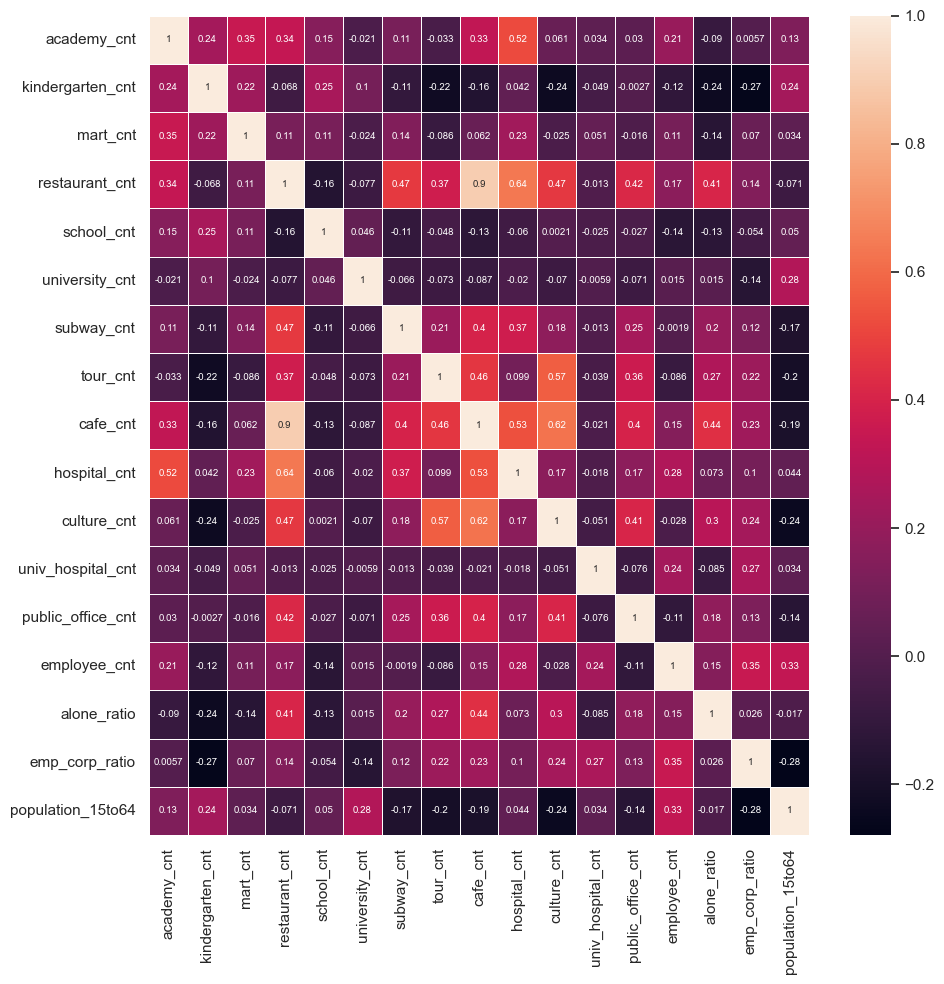

In [4]:
get_heatmap(df_check2)

### `분석 1 결과`
- feature 가공을 통해 대부분의 feature들의 상관관계를 0.7 미만으로 조정

# 2. 다람쥐 버스 정류장은 어느 구에 위치해 있는가?

In [5]:
df_daram = get_daram_95station_df()

In [6]:
df_daram_gu = df_daram.groupby('법정동_구').count()[['NODE_ID']]
df_daram_gu = df_daram_gu.sort_values(by='NODE_ID',ascending=False)

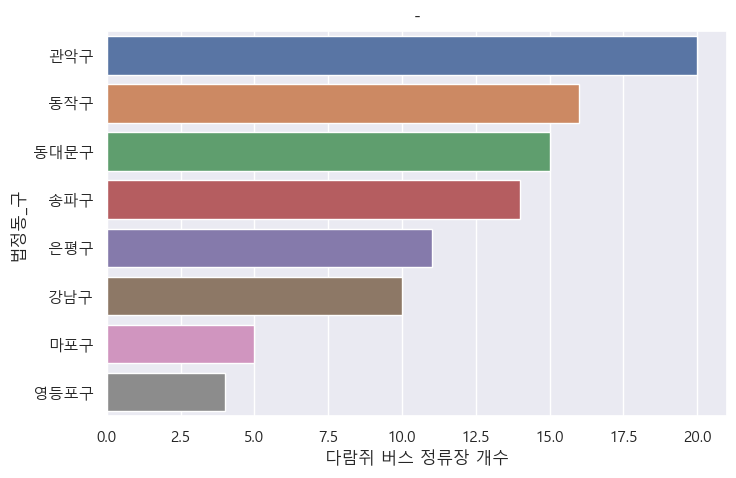

In [7]:
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐 방지
plt.rcParams['font.size'] = 12
plt.figure(figsize=(8,5))
sns.barplot(x='NODE_ID', y=df_daram_gu.index, data =df_daram_gu).\
    set(title='-')
plt.xlabel('다람쥐 버스 정류장 개수')
plt.show();


In [8]:
df_ride_alight_gu = final_tb_infra_population.groupby(['법정동_구']).sum()[['RIDE_SUM_6_10','ALIGHT_SUM_6_10']]
df_ride_alight_gu = df_ride_alight_gu.sort_values(by='RIDE_SUM_6_10',ascending=False)

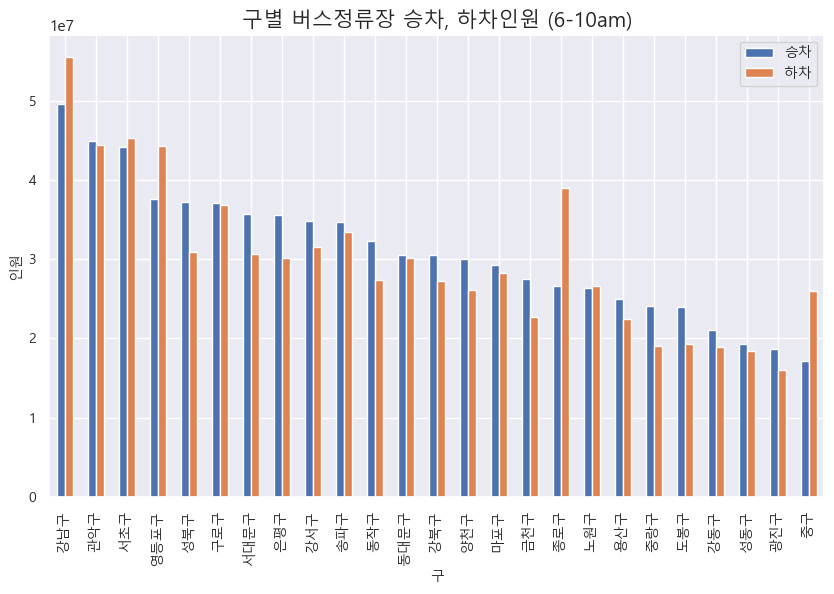

In [9]:
df_ride_alight_gu[['RIDE_SUM_6_10','ALIGHT_SUM_6_10']].plot.bar(figsize=(10,6))
plt.title('구별 버스정류장 승차, 하차인원 (6-10am)',fontsize=15)


plt.tick_params(axis='both', which='major', labelsize=10)

plt.xlabel('구', fontdict={'fontsize': 10})
plt.ylabel('인원', fontdict={'fontsize': 10})

plt.legend(['승차','하차'],fontsize=10)
plt.show()

#### <결론>
- 위의 두 그래프를 비교해봤을 때, 다람쥐버스 정류장이 반드시 버스 승/하차 인원 수가 많은 순으로 설치되는 것은 아니라는 점을 알 수 있다.
- 즉, 버스 승/하차 인원수 외에 기타 요소들(인프라, 인구특성 등)이 버스 정류장 선정에 작용했을 것.
- 그러므로 기존 다람쥐 버스 정류장의 인프라, 인구특성을 파악하고, 이와 유사한 특성을 지닌 정류장을 새로운 다람쥐 버스 정류장으로 선정할 것.
- 또한 기존 구 외에 새로운 구를 탐색할 것.
- 이러한 결론으로 '새로운 다람쥐 정류장을 선정 시 참고할 기준1' 설립.
<br></br>

- ##### <b>✅기준1: 기존 다람쥐 버스 정류장과는 다른 `새로운 구`  & 기존 다람쥐 버스 정류장과 `유사한 인프라, 인구 특성`을 지닐 것. </b>

> # 2. 다람쥐 버스 vs 일반 버스의 정류장 특징 비교

- ##### <b>목적: 일반 버스 정류장과 다람쥐 버스 정류장을 비교하여, 다람쥐 버스 정류장이 타 정류장보다 두드러지게 갖고 있는 인프라, 인구 특성을 파악할 것.</b>

- 아래 두가지 타입의 정류장들의 평균적인 인프라, 인구 특징을 비교
  - 다람쥐 버스: 다람쥐 버스의 정류장(95개) 중 승/하차가 각각 많은 정류장 top 30개의 평균적인 인프라, 인구 수
  - 전체 버스: 일반 버스 정류장 (약 12,000개)의 평균적인 인프라, 인구 수

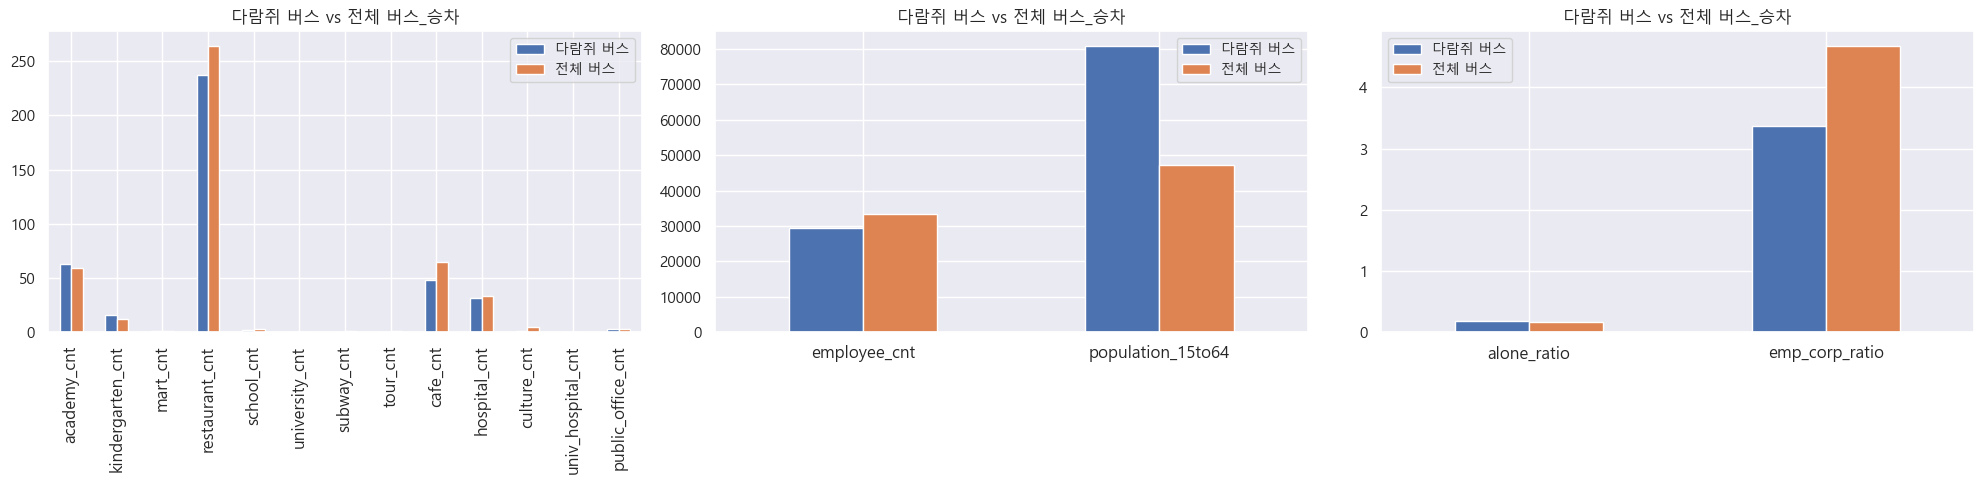

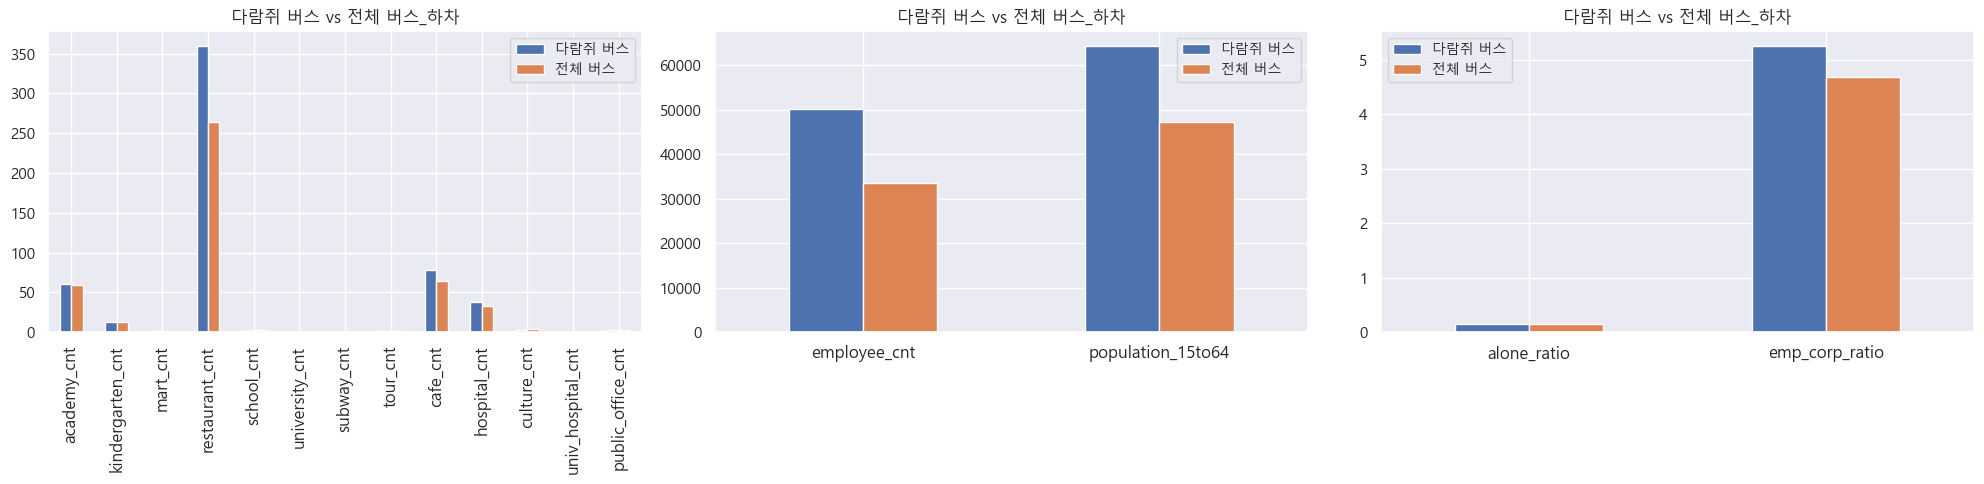

In [10]:
get_barplot_daram_vs_all()

#### <분석 2 결론>
1. 다람쥐 버스의 승차가 많은 지역의 특징
   - 인프라 특징: 학원, 유치원↑
   - 인구 특징: 15-64 경제인구 수 ↑
   - 종합: 거주지의 특징을 보임
 <br></br>
2. 다람쥐 버스의 하차가 많은 지역의 특징
   - 인프라 특징: 학원, 유치원, 병원, 식당, 카페↑
   - 인구 특징: 15-64 경제인구 수, 사업체 별 종사자 수, 종사자 수
   - 종합: 다양한 특징이 혼재
 <br></br>
3. 결론
   - 승차, 하차가 많은 지역의 두드러진 특징을 추출할 수 없었다.
   - 특징이 두드러지게 드러날 수 있도록 하는 분석이 필요하다.
   - 다람쥐 버스의 특징이 뚜렷하게 보이는 정류장 = 다람쥐 버스의 기점, 종점 
   - ⭐추후 분석 방향: 다람쥐 버스의 기점, 종점만의 특징을 분석

> # 3. 다람쥐 버스의 기점, 종점 분석

In [11]:
tb_subway_month_addr = pd.read_csv(os.path.join(csv_path,'tb_subway_month_addr.csv'))
df_filtered = df_preprocess(tb_subway_month_addr)

## 3-1. "다람쥐 버스의 기점, 종점 - 승/하차 수 Top 30인 지하철 역" 과의 연관성

### 1) 승차

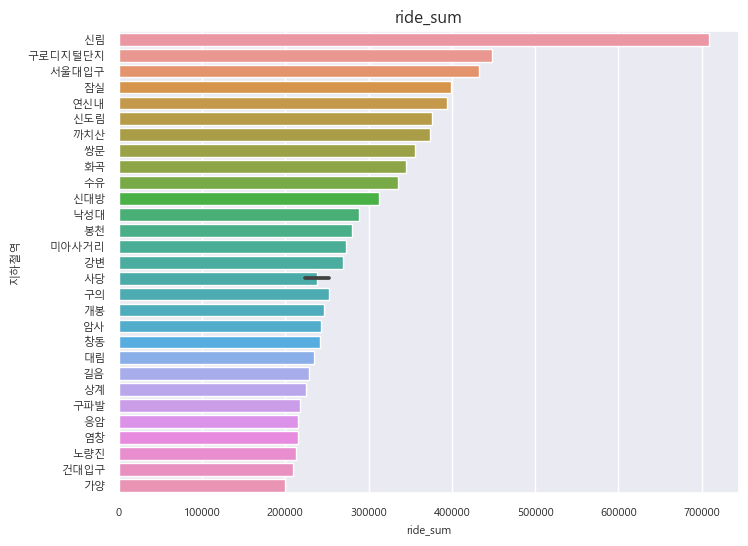

In [12]:
get_subway_barplot(df_filtered, 'ride_sum','지하철역', 'ride_sum')

### 2) 하차

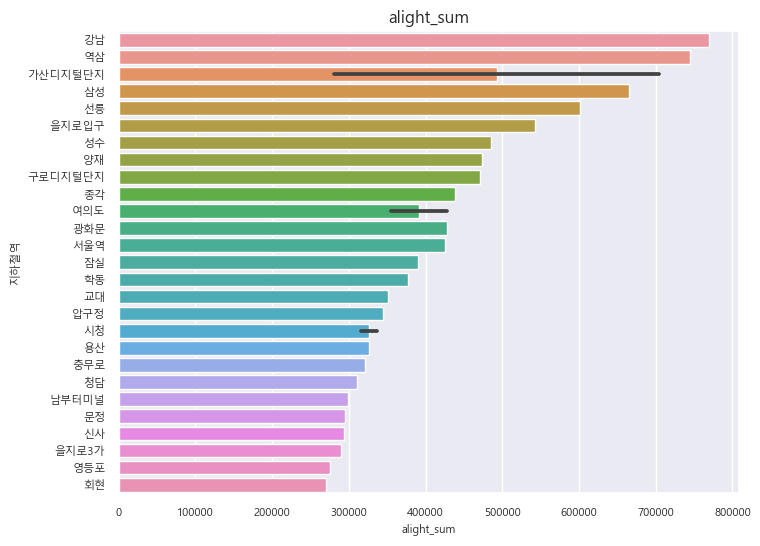

In [13]:
get_subway_barplot(df_filtered, 'alight_sum','지하철역', 'alight_sum')

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-trmu{background-color:#ffffff;border-color:#4d4747;font-family:Tahoma, Geneva, sans-serif !important;font-size:14px;
  text-align:center;vertical-align:top}
.tg .tg-hfcq{background-color:#d4dae4;border-color:#4d4747;color:#000000;font-family:Tahoma, Geneva, sans-serif !important;
  font-size:14px;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-hhed{background-color:#ffffff;border-color:#4d4747;font-family:Tahoma, Geneva, sans-serif !important;font-size:14px;
  text-align:center;vertical-align:top}
</style>

<table class="tg">
<thead>
  <tr>
    <th class="tg-hfcq">노선명</th>
    <th class="tg-hfcq">기점, 종점</th>
    <th class="tg-hfcq">인근 역</th>
    <th class="tg-hfcq">다람쥐버스 정류장</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-trmu">8552</td>
    <td class="tg-trmu">종점</td>
    <td class="tg-trmu">신림</td>
    <td class="tg-trmu">신림사거리.신림역</td>
  </tr>
  <tr>
    <td class="tg-hhed">8331</td>
    <td class="tg-hhed">종점</td>
    <td class="tg-hhed">잠실</td>
    <td class="tg-hhed">잠실역 8번출구</td>
  </tr>
  <tr>
    <td class="tg-trmu">8551</td>
    <td class="tg-trmu">기점</td>
    <td class="tg-trmu">봉천</td>
    <td class="tg-trmu">봉천역</td>
  </tr>
  <tr>
    <td class="tg-hhed">8551</td>
    <td class="tg-hhed">종점</td>
    <td class="tg-hhed">노량진</td>
    <td class="tg-hhed">노량진역 3번출구</td>
  </tr>
</tbody>
</table>

- 다람쥐 버스의 기점, 종점 14개 중 4개만 승차 수 Top 30인 지하철역과 연관있음.

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-trmu{background-color:#ffffff;border-color:#4d4747;font-family:Tahoma, Geneva, sans-serif !important;font-size:14px;
  text-align:center;vertical-align:top}
.tg .tg-hfcq{background-color:#d4dae4;border-color:#4d4747;color:#000000;font-family:Tahoma, Geneva, sans-serif !important;
  font-size:14px;font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-hfcq">노선명</th>
    <th class="tg-hfcq">기점, 종점</th>
    <th class="tg-hfcq">인근 역</th>
    <th class="tg-hfcq">다람쥐버스 정류장</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-trmu">8331</td>
    <td class="tg-trmu">종점</td>
    <td class="tg-trmu">잠실</td>
    <td class="tg-trmu">잠실역 8번출구</td>
  </tr>
</tbody>
</table>

- 다람쥐 버스의 기점, 종점 14개 중 1개만 하차 수 Top 30인 지하철역과 연관있음.


#### <분석 3-1 결론>
- 다람쥐 버스의 기점, 종점이 반드시 승/하차 인구 수(유동인구 수)가 많은 지하철 역의 인근에 있는 것은 아니다.
- 즉, 다람쥐 버스의 기점, 종점을 선정할 때 유동인구가 절대적인 기준이 되지는 않는다.

## 3-2. 다람쥐 버스 기, 종점의 인프라, 인구 특징 분석

In [14]:
df_scaled = get_scaled_daram_df()

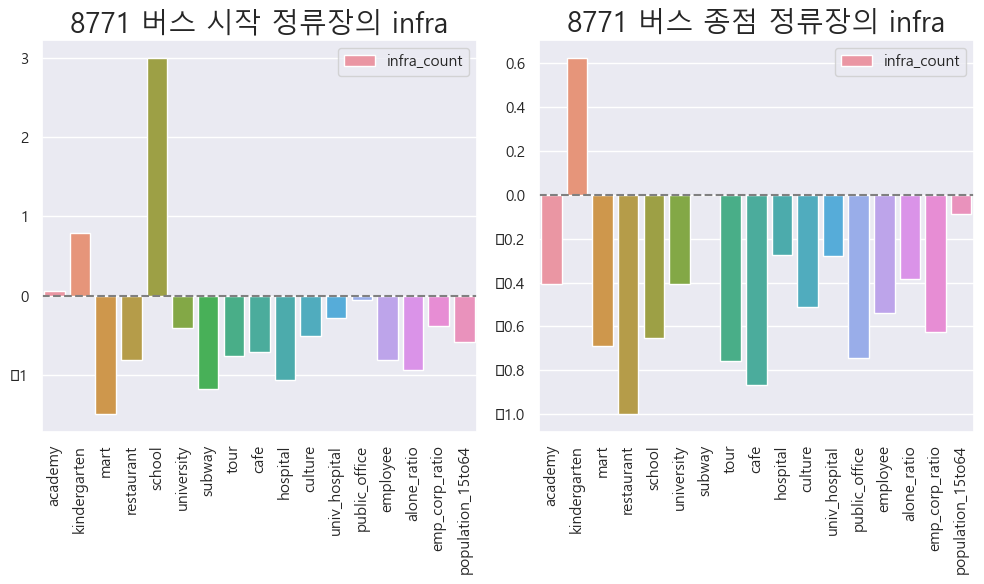

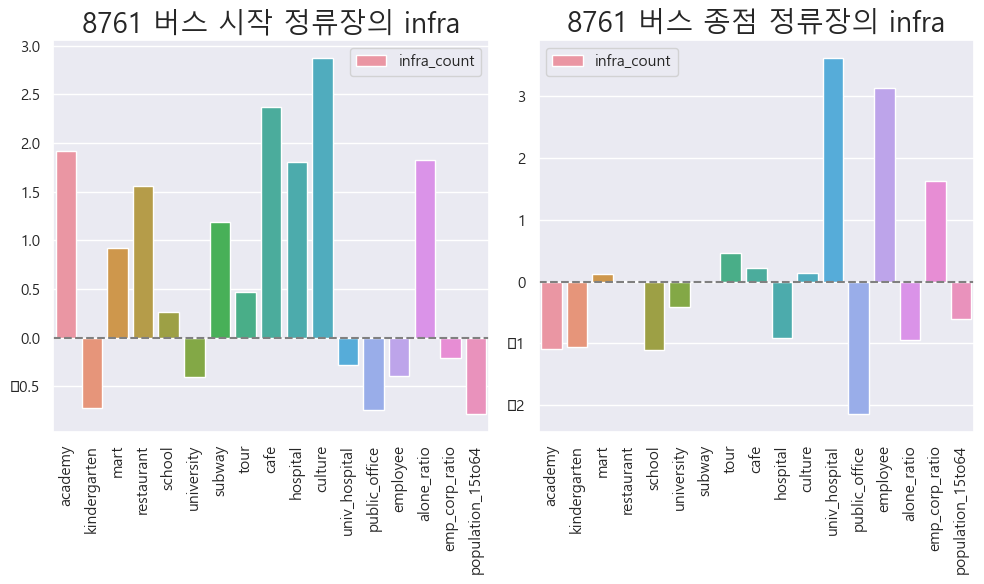

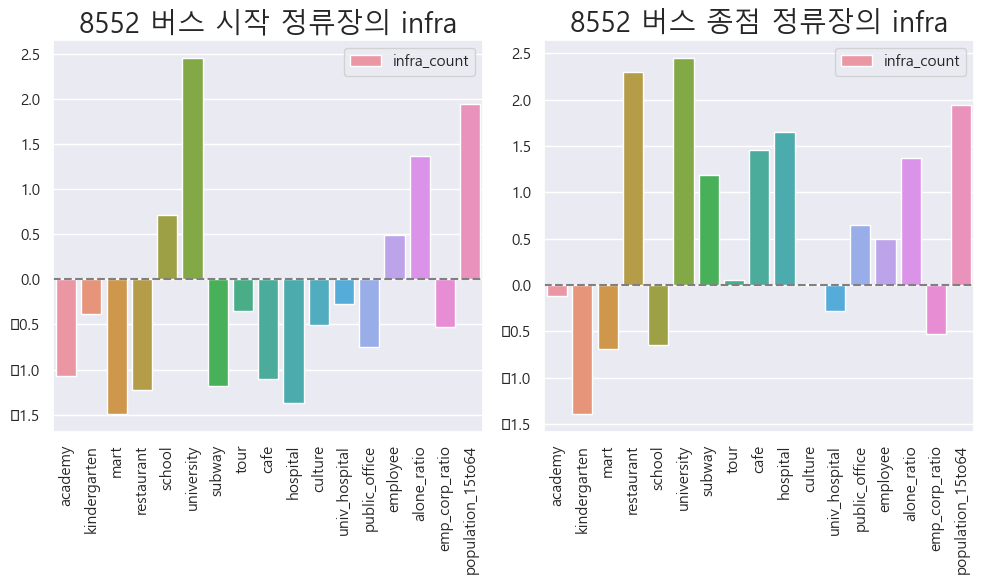

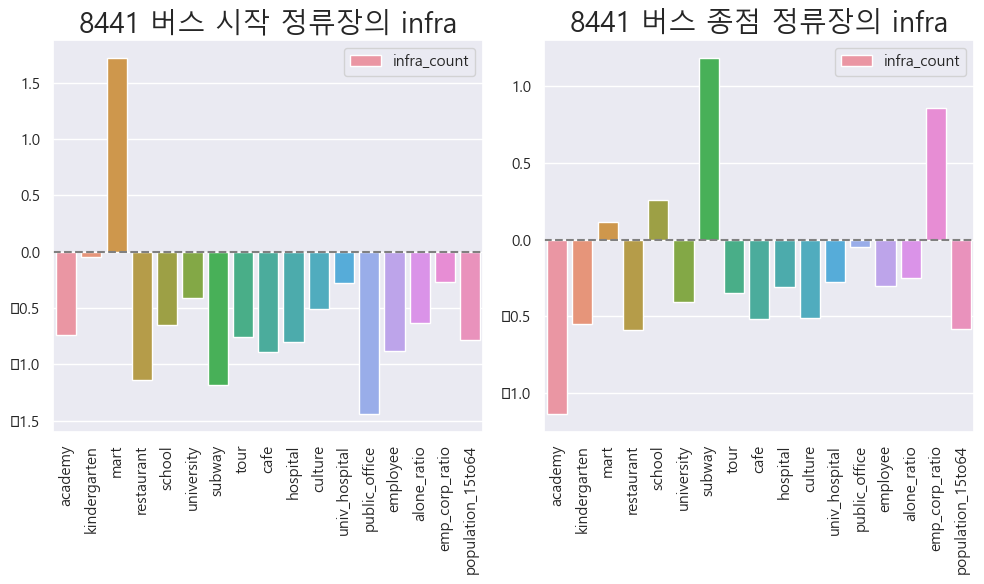

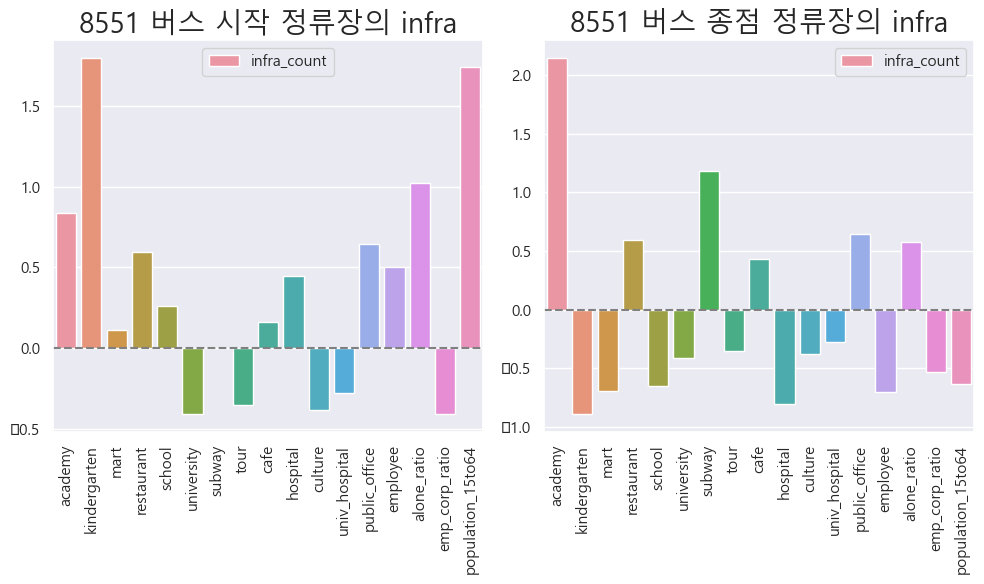

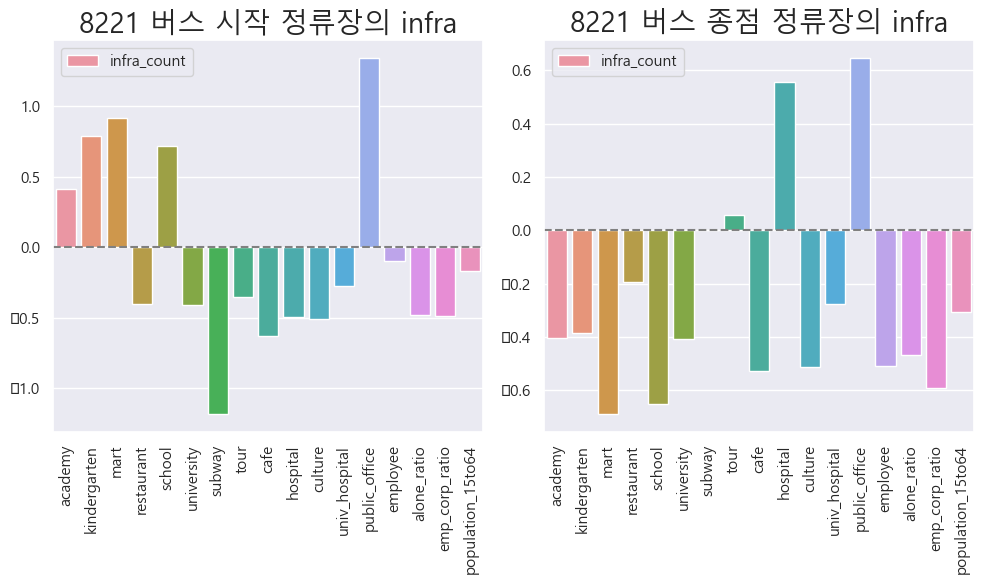

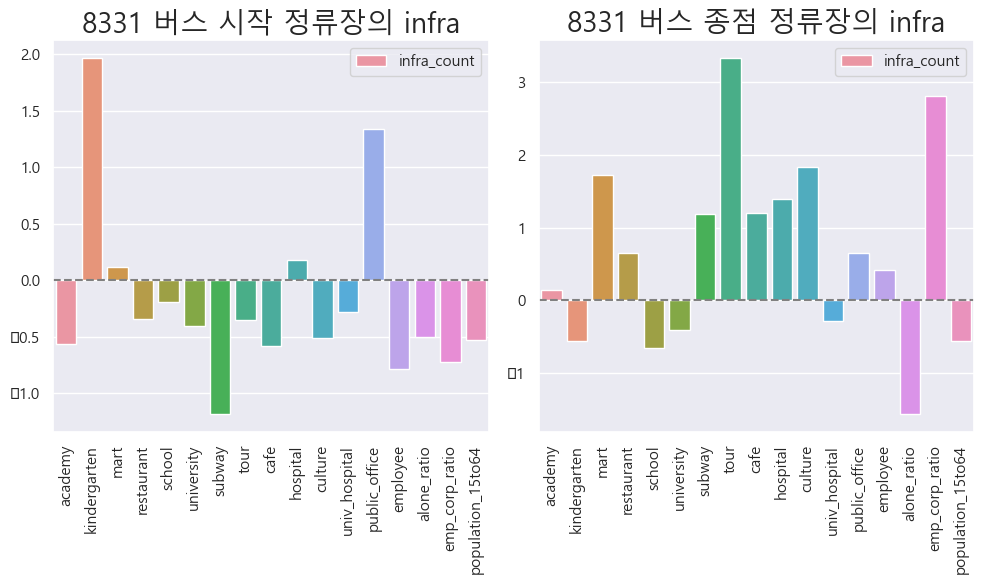

In [15]:
get_barplot_start_end(df_scaled)

#### <분석 3-2 결론>
<style type="text/css">
.tg  {border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-toki{border-color:#000000;font-family:Arial, Helvetica, sans-serif !important;font-size:12px;text-align:center;
  vertical-align:top}
.tg .tg-6532{background-color:#EBF3F9;border-color:#000000;font-family:Arial, Helvetica, sans-serif !important;font-size:12px;
  text-align:center;vertical-align:middle}
.tg .tg-cx9v{background-color:#ebf3f9;border-color:#000000;font-family:Arial, Helvetica, sans-serif !important;font-size:12px;
  font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-5cm9{background-color:#ffffff;border-color:#000000;font-family:Arial, Helvetica, sans-serif !important;font-size:12px;
  text-align:center;vertical-align:middle}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-6532"> <span style="font-weight:bold;color:black">노선</span> </th>
    <th class="tg-6532"> <span style="font-weight:bold;color:black">정류장   명</span></th>
    <th class="tg-6532"><span style="font-weight:bold;color:black">위치</span></th>
    <th class="tg-6532"><span style="font-weight:bold;color:black">인프라, 인구   특징</span>   </th>
    <th class="tg-cx9v"><br>인구 특징</th>
    <th class="tg-6532"><span style="font-weight:bold;color:black">지하철역   수</span>   </th>
    <th class="tg-6532">   <br><span style="font-weight:bold;font-style:normal;color:black">지하철</span><br><span style="font-weight:bold;font-style:normal;color:black"> 총합</span>   </th>
    <th class="tg-6532"><span style="font-weight:bold;color:black">종합적인  특징</span></th>
    <th class="tg-6532"> <span style="font-weight:bold;color:black">운행</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-6532" rowspan="2"> <span style="font-weight:bold;color:black">8771</span></td>
    <td class="tg-5cm9"><span style="color:black">구산중</span></td>
    <td class="tg-5cm9"><span style="color:black">기점</span></td>
    <td class="tg-5cm9"><span style="color:black">초중고등학교 , 유치원, 학원</span></td>
    <td class="tg-toki">-</td>
    <td class="tg-5cm9"><span style="color:black">0</span></td>
    <td class="tg-5cm9" rowspan="2"><span style="color:black">1</span></td>
    <td class="tg-5cm9"><span style="color:black">거주지</span></td>
    <td class="tg-5cm9" rowspan="2"> <span style="color:black">편도</span></td>
  </tr>
  <tr>
    <td class="tg-5cm9"><span style="color:black">녹번역</span></td>
    <td class="tg-5cm9"><span style="color:black">종점</span></td>
    <td class="tg-5cm9"><span style="color:black">유치원</span></td>
    <td class="tg-toki">-</td>
    <td class="tg-5cm9"><span style="color:black">1</span> </td>
    <td class="tg-5cm9"><span style="color:black">거주지</span></td>
  </tr>
  <tr>
    <td class="tg-6532" rowspan="2"><span style="font-weight:bold;color:black">8761</span></td>
    <td class="tg-5cm9"><span style="color:black">신촌역</span></td>
    <td class="tg-5cm9"><span style="color:black">기점</span> <br></td>
    <td class="tg-5cm9"><span style="color:black">문화시설,   cafe, 학원, 병원, 지하철</span>   </td>
    <td class="tg-toki">1인 가구 비율</td>
    <td class="tg-5cm9"><span style="color:black">2</span></td>
    <td class="tg-5cm9" rowspan="2"><span style="color:black">3</span></td>
    <td class="tg-5cm9"><span style="color:black">번화가</span></td>
    <td class="tg-5cm9" rowspan="2"><span style="color:black">왕복</span></td>
  </tr>
  <tr>
    <td class="tg-5cm9"><span style="color:black">국회 의사당</span></td>
    <td class="tg-5cm9"><span style="color:black">종점</span> <br></td>
    <td class="tg-5cm9">대학병원, 관광지, 카페, 마트</td>
    <td class="tg-toki">종사자 수,<br>종사자수/사업체 수 비율</td>
    <td class="tg-5cm9"><span style="color:black">1</span></td>
    <td class="tg-5cm9"> <span style="color:black">업무지구</span></td>
  </tr>
  <tr>
    <td class="tg-6532" rowspan="2"><span style="font-weight:bold;color:black">8552</span></td>
    <td class="tg-5cm9"><span style="color:black">신림복지관앞</span> </td>
    <td class="tg-5cm9"><span style="color:black">기점</span></td>
    <td class="tg-5cm9">  <span style="color:black">대학교,&nbsp;&nbsp;초중고등학교</span></td>
    <td class="tg-toki">경제활동 인구,<br>종사자 수, 1인 가구비율</td>
    <td class="tg-5cm9"><span style="color:black">0</span></td>
    <td class="tg-5cm9" rowspan="2">   <br><span style="font-weight:normal;font-style:normal;color:black">2</span>   </td>
    <td class="tg-5cm9"> <span style="color:black">대학가, 거주지</span>   </td>
    <td class="tg-5cm9" rowspan="2"> <span style="color:black">편도</span></td>
  </tr>
  <tr>
    <td class="tg-5cm9"><span style="color:black">신림역</span></td>
    <td class="tg-5cm9"><span style="color:black">종점</span></td>
    <td class="tg-5cm9">  <span style="color:black">대학교, 병원, 지하철, 공공기관</span></td>
    <td class="tg-toki">경제활동 인구,<br>1인가구 비율,<br>종사자 수</td>
    <td class="tg-5cm9"><span style="color:black">2</span></td>
    <td class="tg-5cm9"><span style="color:black">혼합</span></td>
  </tr>
  <tr>
    <td class="tg-6532" rowspan="2"> <span style="font-weight:bold;color:black">8441</span></td>
    <td class="tg-5cm9"><span style="color:black">은곡마을</span></td>
    <td class="tg-5cm9"> <span style="color:black">기점</span></td>
    <td class="tg-5cm9"><span style="color:black">마트, 유치원</span>   </td>
    <td class="tg-toki">-</td>
    <td class="tg-5cm9"><span style="color:black">0</span></td>
    <td class="tg-5cm9" rowspan="2">   <br><span style="font-weight:normal;font-style:normal;color:black">2</span>   </td>
    <td class="tg-5cm9"><span style="color:black">거주지</span></td>
    <td class="tg-5cm9" rowspan="2"><span style="color:black">편도</span></td>
  </tr>
  <tr>
    <td class="tg-5cm9"><span style="color:black">수서역</span></td>
    <td class="tg-5cm9"><span style="color:black">종점</span></td>
    <td class="tg-5cm9">지하철, 초중고등학교, 마트</td>
    <td class="tg-toki">종사자/ 사업체 수 비율</td>
    <td class="tg-5cm9"><span style="color:black">2</span></td>
    <td class="tg-5cm9"><span style="color:black">교통허브</span></td>
  </tr>
  <tr>
    <td class="tg-6532" rowspan="2">&nbsp;&nbsp;&nbsp;<br><span style="font-weight:bold;font-style:normal;color:black">8551</span>&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-5cm9"><span style="color:black">봉천역</span></td>
    <td class="tg-5cm9"><span style="color:black">기점</span></td>
    <td class="tg-5cm9"> <span style="color:black">유치원, 공공기관, 학원, 초중고등학교, 학원</span>   </td>
    <td class="tg-toki">경제활동 인구 수,<br>1인가구 비율,<br>종사자 수</td>
    <td class="tg-5cm9"><span style="color:black">1</span></td>
    <td class="tg-5cm9" rowspan="2">   <br><span style="font-weight:normal;font-style:normal;color:black">3</span>   </td>
    <td class="tg-5cm9"><span style="color:black">거주지</span></td>
    <td class="tg-5cm9" rowspan="2"> <span style="color:black">왕복</span></td>
  </tr>
  <tr>
    <td class="tg-5cm9"><span style="color:black">노량진역</span></td>
    <td class="tg-5cm9"> <span style="color:black">종점</span></td>
    <td class="tg-5cm9">  <span style="color:black">학원, 지하철, 공공기관</span></td>
    <td class="tg-toki">1인가구 비율</td>
    <td class="tg-5cm9"><span style="color:black">2</span></td>
    <td class="tg-5cm9"><span style="color:black">학원가, 번화가</span></td>
  </tr>
  <tr>
    <td class="tg-6532" rowspan="2"><span style="font-weight:bold;color:black">8221</span></td>
    <td class="tg-5cm9"><span style="color:black">장안2동</span>   <br><span style="font-weight:normal;font-style:normal;color:black">주민센터</span>   </td>
    <td class="tg-5cm9"> <span style="color:black">기점</span></td>
    <td class="tg-5cm9">   <span style="color:black">공공기관, 마트 ,유치원, 초중고등학교</span></td>
    <td class="tg-toki">-<br></td>
    <td class="tg-5cm9"> <span style="color:black">0</span></td>
    <td class="tg-5cm9" rowspan="2"><span style="color:black">1</span></td>
    <td class="tg-5cm9"><span style="color:black">거주지</span></td>
    <td class="tg-5cm9" rowspan="2"><span style="color:black">편도</span></td>
  </tr>
  <tr>
    <td class="tg-5cm9"> <span style="color:black">답십리역</span></td>
    <td class="tg-5cm9"> <span style="color:black">종점</span></td>
    <td class="tg-5cm9">  <span style="color:black">공공기관, 병원, 관광지</span>  </td>
    <td class="tg-toki">-</td>
    <td class="tg-5cm9"><span style="color:black">1</span></td>
    <td class="tg-5cm9"><span style="color:black">번화가</span></td>
  </tr>
  <tr>
    <td class="tg-6532" rowspan="2">&nbsp;&nbsp;&nbsp;<br><span style="font-weight:bold;font-style:normal;color:black">8331</span>&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-5cm9"><span style="color:black">마천역</span></td>
    <td class="tg-5cm9"> <span style="color:black">기점</span></td>
    <td class="tg-5cm9"><span style="color:black">유치원, 공공기관, 병원, 마트</span>   <br></td>
    <td class="tg-toki">-</td>
    <td class="tg-5cm9"><span style="color:black">0</span></td>
    <td class="tg-5cm9" rowspan="2"><span style="color:black">2</span></td>
    <td class="tg-5cm9"><span style="color:black">거주지</span></td>
    <td class="tg-5cm9" rowspan="2"><span style="color:black">편도</span></td>
  </tr>
  <tr>
    <td class="tg-5cm9"><span style="color:black">잠실역</span></td>
    <td class="tg-5cm9"><span style="color:black">종점</span></td>
    <td class="tg-5cm9"><span style="color:black">관광지, 문화시설, 병원, 지하철</span>  <br></td>
    <td class="tg-toki">종사자 수/ 사업체 수 비율</td>
    <td class="tg-5cm9"><span style="color:black">2</span></td>
    <td class="tg-5cm9"> <span style="color:black">번화가</span></td>
  </tr>
</tbody>
</table>

- 기존 다람쥐 버스의 유형은 크게 3가지로 나뉜다.
  - 거주지 - 거주지 (편도)
  - 번화가 - 번화가 (왕복)
  - 거주지 - 번화가 (편도, 왕복)
<br></br>
- __기존 다람쥐 버스 `기점`의 특징__
  - 인근 지하철역 수: 0~2개까지 다양하게 혼재
  - 인프라 특징: 
    - 인근 지하철역이 0개인 곳은 거주지 & 편도 운행의 특징을 지님
 <br></br>
- __기존 다람쥐 버스 `종점`의 특징__
  - 인근 지하철역 수: 모두 1개 이상
  - 인프라 특징: 거주지, 업무지구, 번화가 등 다양한 특징을 지님.
 <br></br>
- 종합
  - 기존 다람쥐 버스는 기점, 종점 인근(500m 이내)의 지하철 수의 합이 1개 이상이다.
  - 편도 노선은 기점이 거주지의 특성을 지님. 
  - 다람쥐 버스 유형
     - 편도: 대부분 주거지 - 지하철역 잇고 있음.
     - 왕복: 지하철역 - 지하철역 잇고 있음.
- 종합적인 내용을 바탕으로 기준2를 산출할 수 있다.
<b></b>

- #### <b>✅기준2: 새로운 다람쥐 버스의 기점, 종점 인근에는 지하철이 1개 이상이어야 함 </b>

> # 4. EDA 결론 (기존 다람쥐 버스 분석)
- 다람쥐 버스의 기점, 종점을 선정할 때 유동인구가 절대적인 기준이 되지는 않는다.
- 정류장마다 인프라 특성이 다름.
- 다람쥐 버스 유형
  - 편도: 대부분 주거지 - 지하철역 잇고 있음.
  - 왕복: 지하철역 - 지하철역 잇고 있음.

- ⭐기존 다람쥐 버스에 대해 분석한 내용을 바탕으로 새로운 노선 선정할 것.
